# Analyzing results of one experiment. In this notebook we analyze the following for DeepAR model on Electrecity dataset
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [35]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [36]:
from src.RQ1_forecast import *

In [37]:
num_samples = 100

In [38]:
data_address1 = '/datadrive/deep_ar/electricity/5A'

# Forecast section

## Load data

In [39]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

106it [00:00, 28180.02it/s]
100%|###########| 100/100 [01:15<00:00,  1.33it/s]


In [40]:
len(forcast_list1)

100

In [41]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)

In [42]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,12.237657,15.133706,14.737113,13.273027,13.009253,10.864920,...,15.236006,11.304832,16.658216,14.950354,9.879942,14.410413,0,12.512512,4.483272,0.113782
1,1,0,2014-05-26 21:00:00,10.0,9.057462,23.425327,18.301964,15.912202,20.933619,18.706175,...,11.398431,16.693950,22.159515,15.528682,18.099000,22.532503,0,20.143100,8.943163,0.098296
2,1,0,2014-05-26 22:00:00,22.0,14.016649,16.759853,16.560665,17.344568,28.390530,20.900639,...,12.535929,13.358883,11.105467,16.646180,15.013381,18.127542,0,18.553237,4.893311,0.131883
3,1,0,2014-05-26 23:00:00,20.0,20.367722,17.930445,18.271822,19.419256,22.446486,20.939955,...,18.034206,18.024292,19.984255,19.284977,20.002855,19.035078,0,19.515835,3.252827,0.132622
4,1,0,2014-05-27 00:00:00,13.0,14.021609,18.277750,17.327085,17.908405,18.593592,16.991655,...,16.885605,17.977001,15.707679,17.430574,10.972869,21.843857,0,18.176119,2.403508,0.135988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3363.751000,3627.042700,3551.163000,3712.490700,3318.937700,3804.443800,...,3107.498300,3482.835400,3320.981200,3763.046600,3438.459700,3614.082500,320,3458.911958,273.041950,0.097485
53924,1,2246,2014-06-02 16:00:00,4120.0,3474.745000,3898.852800,3260.412000,4097.253000,3471.480500,3350.084700,...,3428.526000,3346.625200,3739.480500,3518.259300,3906.076200,3742.893300,320,3498.596012,241.932707,0.141993
53925,1,2246,2014-06-02 17:00:00,3951.0,3649.840300,3583.465000,3453.404800,3705.102800,3562.578900,3402.502000,...,3141.656500,3127.164600,3375.900400,3491.381600,3437.383500,3588.928500,320,3506.911943,263.102431,0.140630
53926,1,2246,2014-06-02 18:00:00,3907.0,3403.365200,3472.571000,3421.258300,3655.747300,3260.040800,3272.351300,...,3045.357400,3276.867700,3248.406700,2886.548800,3494.214600,3417.477000,320,3381.088577,238.001527,0.183526


## get each time series individually

In [43]:
target_forcast_series = get_forcast_target(forcast_list1)

In [44]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

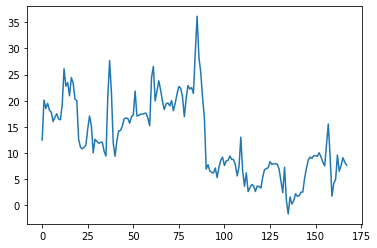

In [45]:
# plot mean of only one time series
rep_no = 0
# plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()

## plot the kde for experiments

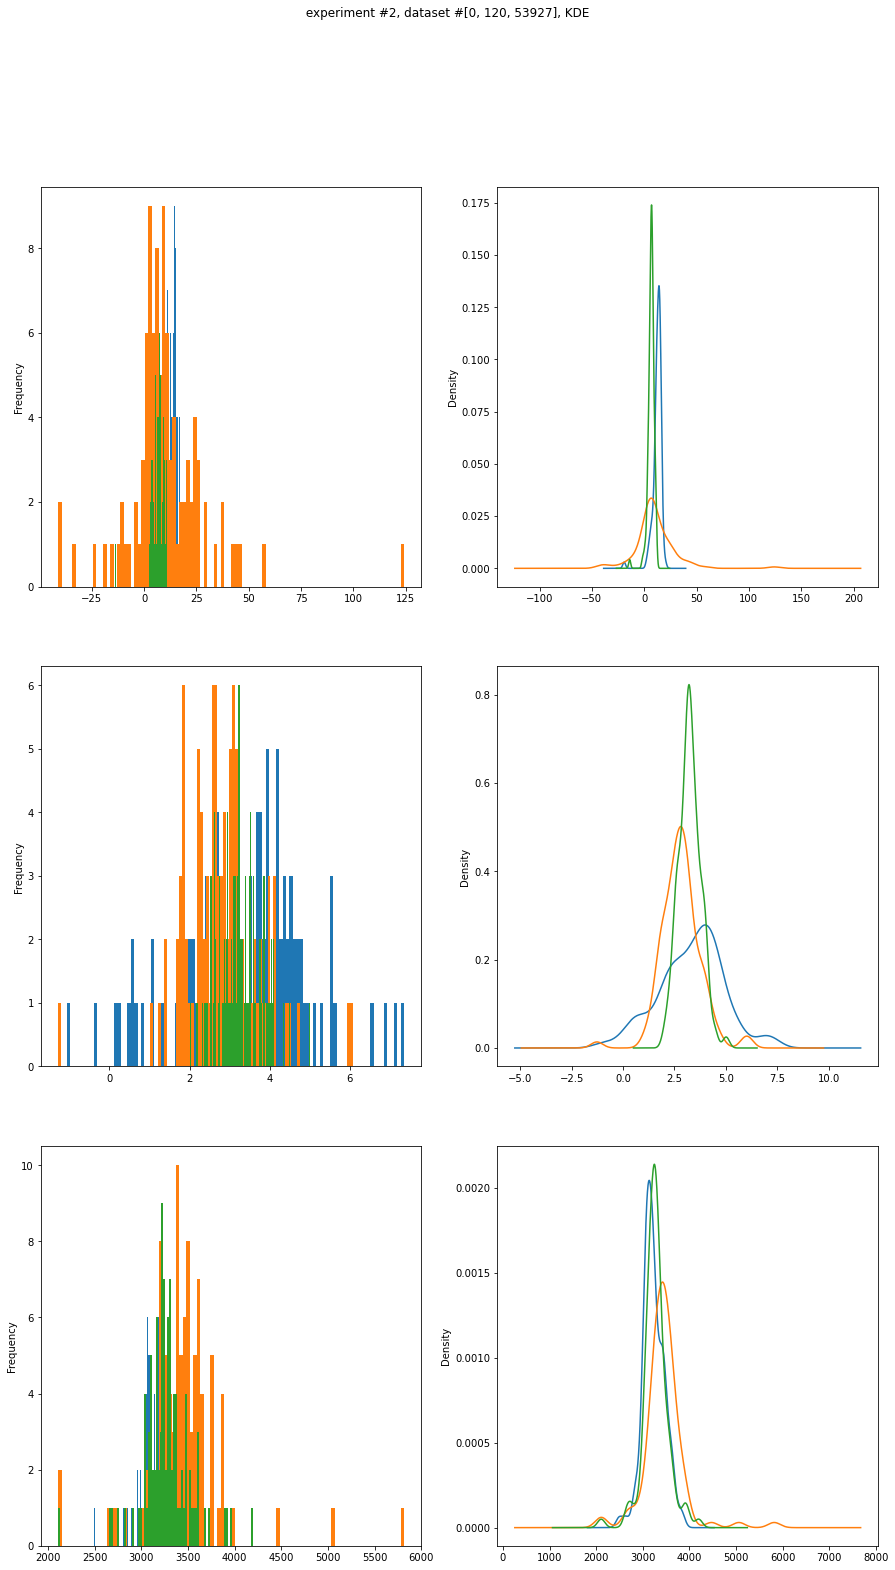

In [46]:
data_n = [0, 120, 53927]
max_shape = 3 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [47]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

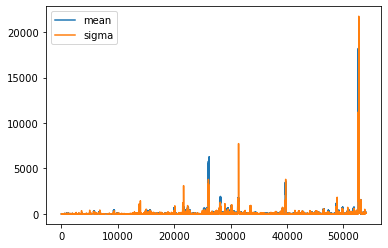

In [48]:
df_std_forecast.T.plot()

## plot samples of experimets

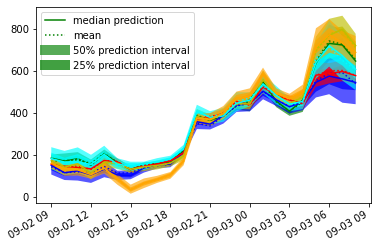

In [49]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 53736
plot_forscast_same(sample_forcast_list1, tmp_n, lim=5)

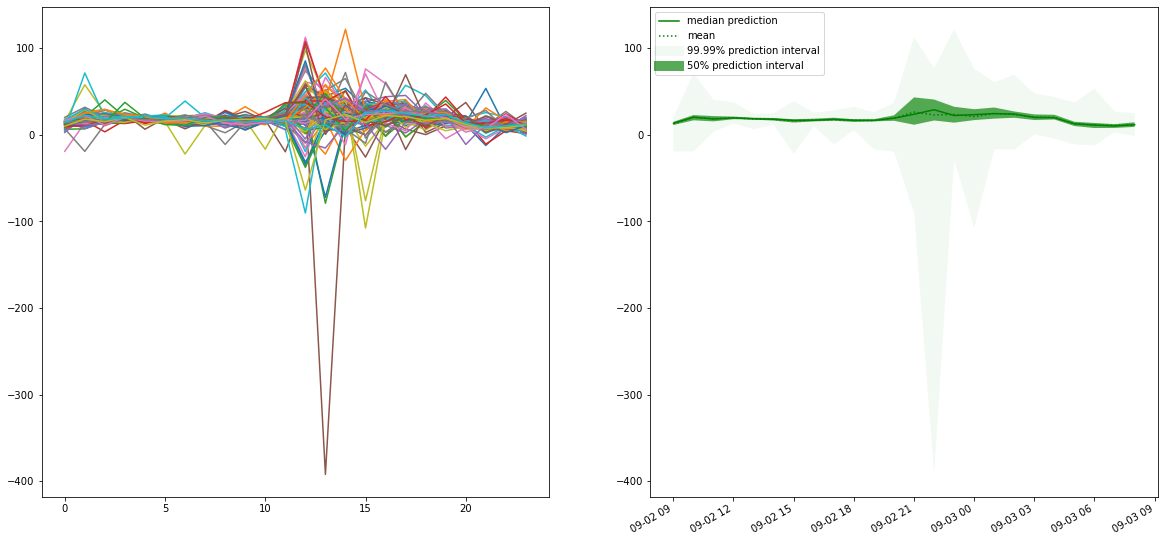

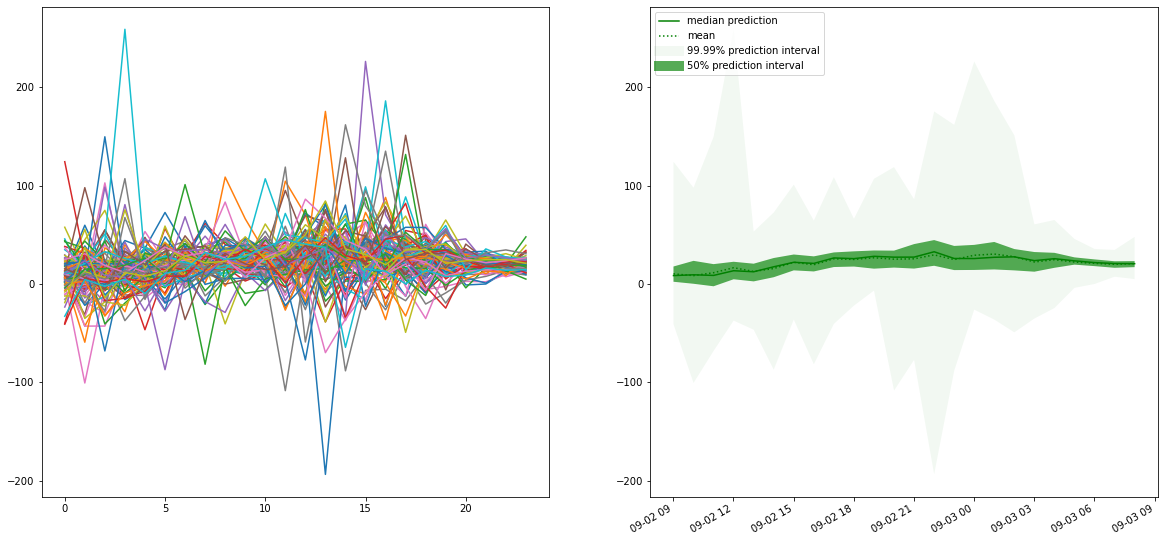

In [50]:
time_point_no = 0
rep_lim = 2
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [51]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 90
sample90 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 91
sample91 = sample_forcast_list1[exp_n][data_n_el]

(0.0, 40.0)

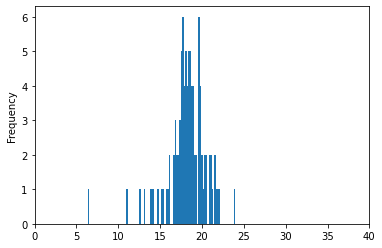

In [52]:
# plot the samples
sample0.plot.hist(bins = 100)
plt.xlim([0,40])

(0.0, 40.0)

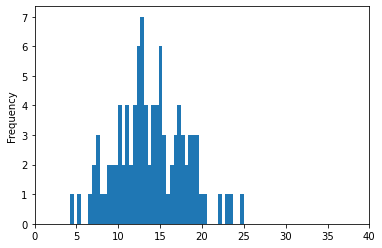

In [53]:
sample90.plot.hist(bins = 100)
plt.xlim([0,40])

(0.0, 40.0)

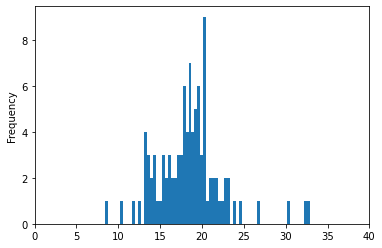

In [54]:
sample91.plot.hist(bins = 100)
plt.xlim([0,40])

In [55]:
# calculate the table of ks tests for each time points
data_point = 4
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [56]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [57]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.0692929292929293

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [58]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


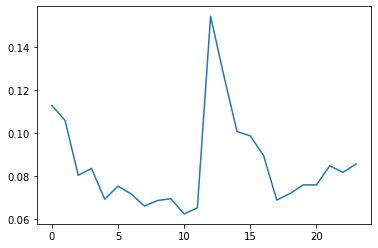

In [59]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.title(f'first day of time series #{i}')

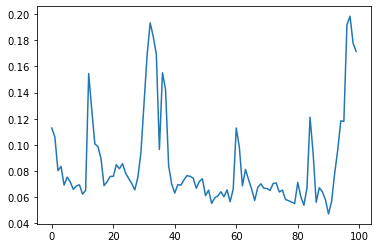

In [60]:
i = 0
plt.plot(portion_array[i*168 : (i+1)*168])
# plt.title(f'time series #{i}')

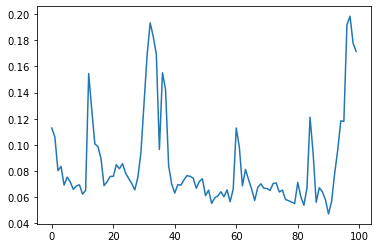

In [61]:
plt.plot(portion_array)
# plt.title('all time series')

In [62]:
i = 320
forcast_list1[0].iloc[(168*i):(168*i + 24)]


,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
53760,1,320,2014-05-26 20:00:00,3019.0,2828.2780,2908.7544,2865.7844,2909.3206,2954.1958,2904.7585,...,3077.3516,2926.2776,2754.2275,3036.6833,2950.9211,2950.2566,320,2994.034307,238.891407,0.116613
53761,1,320,2014-05-26 21:00:00,2927.0,2814.3079,2992.4624,2875.8142,2907.0405,2638.6145,3292.3472,...,3048.0903,2766.4524,2731.5770,2803.8345,2692.5942,3079.8770,320,2833.391319,233.156549,0.143619
53762,1,320,2014-05-26 22:00:00,2857.0,2774.3230,3062.4092,2382.9553,2963.9827,2847.2220,2353.4932,...,3538.1594,2603.9870,2450.6394,2828.0757,2747.1950,2979.6104,320,2734.730418,289.819079,0.121872
53763,1,320,2014-05-26 23:00:00,2731.0,2771.8494,2676.6707,2529.1729,2547.0513,2423.6720,2401.7734,...,2846.3843,2541.5977,2619.9043,2650.9612,2551.4536,2504.7864,320,2571.200286,211.403124,0.135563
53764,1,320,2014-05-27 00:00:00,2693.0,2622.8170,2652.2156,2676.8200,2518.5154,2317.7827,2330.5244,...,2681.7998,2630.3086,2488.9260,2652.3184,2581.8132,2641.8845,320,2531.228221,171.953635,0.154192
53765,1,320,2014-05-27 01:00:00,2690.0,2304.7166,2424.0686,2610.1914,2606.7231,1970.8478,2641.1702,...,2648.3750,2467.1387,1714.5375,2742.7515,2298.4973,2666.6719,320,2494.915104,185.901528,0.145364
53766,1,320,2014-05-27 02:00:00,2626.0,2432.5840,3102.1753,2475.3008,2684.6624,2129.4960,2519.2622,...,2484.3640,2515.6692,1905.1720,2649.5195,2665.6506,2694.1323,320,2536.397085,205.051624,0.170445
53767,1,320,2014-05-27 03:00:00,2545.0,3137.6938,2610.4770,2467.4792,2295.2483,2552.4424,2296.1714,...,2499.2158,2362.8938,2287.7092,2402.1650,2279.7944,2359.6206,320,2456.663948,177.928983,0.142517
53768,1,320,2014-05-27 04:00:00,2457.0,2500.7258,2553.1812,2651.1504,2381.5637,2387.8938,2427.7505,...,2648.9460,2824.7332,2640.3910,2381.9631,2363.7840,2661.1130,320,2476.241832,255.760272,0.109876
53769,1,320,2014-05-27 05:00:00,2556.0,2322.0686,2288.2307,2353.4758,2583.9958,2218.3484,2576.5405,...,2312.8090,2316.4753,2445.2954,2407.3682,2515.8418,4245.3410,320,2471.975074,241.009261,0.106935


## mean of ks test for each horizon

In [63]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i, 168*i+24)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ks_array


ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


array([[0.11292929, 0.10606061, 0.08040404, ..., 0.08484848, 0.08181818,
        0.08565657],
       [0.33777778, 0.30121212, 0.29232323, ..., 0.22949495, 0.24646465,
        0.23616162],
       [0.31656566, 0.27454545, 0.26505051, ..., 0.21494949, 0.21353535,
        0.20282828],
       ...,
       [0.32848485, 0.24969697, 0.22242424, ..., 0.21191919, 0.22929293,
        0.23313131],
       [0.29232323, 0.27494949, 0.24343434, ..., 0.19353535, 0.21454545,
        0.20949495],
       [0.30727273, 0.2979798 , 0.2640404 , ..., 0.16909091, 0.18282828,
        0.19212121]])

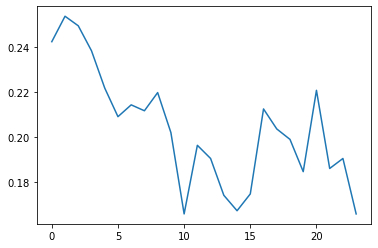

In [64]:

i = 9
plt.plot(ks_array[i])
# plt.boxplot(ks_array[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f34dfbe9ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34dfb71590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34dfbe9590>,
 'medians': [<matplotlib.lines.Line2D at 0x7f34dfb78090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34dfb785d0>,
 'means': []}

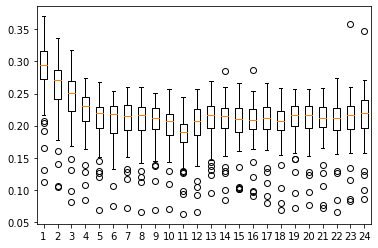

In [65]:
# plt.plot(ks_array.mean(axis=0))
plt.boxplot(ks_array)

## now we look at the last window of prediction

In [66]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array7 = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i+144, 168*i+168)):
        ks_table7 = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')


ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


{'whiskers': [<matplotlib.lines.Line2D at 0x7f34c6835150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34c6835bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34c68aabd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f34c683d6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34c683dc10>,
 'means': []}

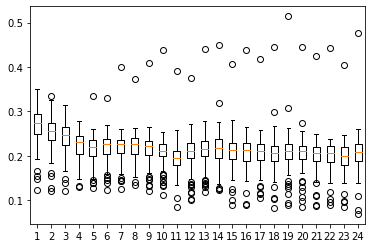

In [67]:
# plt.plot(ks_array.mean(axis=0))
plt.boxplot(ks_array7)

In [68]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array6 = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i+120, 168*i+144)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array6[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


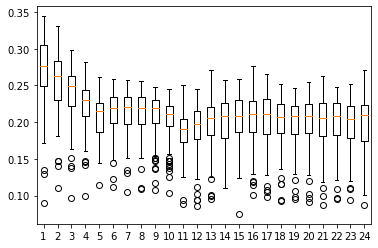

In [70]:
plt.boxplot(ks_array6)
plt.show()